###    Contents
#####  1.0 importing libraries 
#####  2.0 import dataset
#####  3.0 Exploring Relationships

#### 1.0 importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### 2.0 import dataset

In [11]:
# importing dataset
df_US_Ecom = pd.read_pickle('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_US_Ecom1.pkl')

In [60]:
df_US_Ecom.head(5)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,187.3815


In [12]:
#checking the columns 
df_US_Ecom.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
#creating a subset
df_sub = df_US_Ecom[[ 'Sales',
       'Quantity', 'Discount', 'Profit']]

In [24]:
#The head subset
df_sub.head(3)

,Sales,Quantity,Discount,Profit
0,48.896,4,0.2,8.5568
1,474.430,11,0.0,199.2606
2,3.600,2,0.0,1.7280


#### 3.0 Exploring Relationships

##### Correlations:

In [25]:
#creating correlation
df_sub.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.191127,-0.033516,0.856233
Quantity,0.191127,1.000000,0.019184,0.127189
Discount,-0.033516,0.019184,1.000000,0.042617
Profit,0.856233,0.127189,0.042617,1.000000


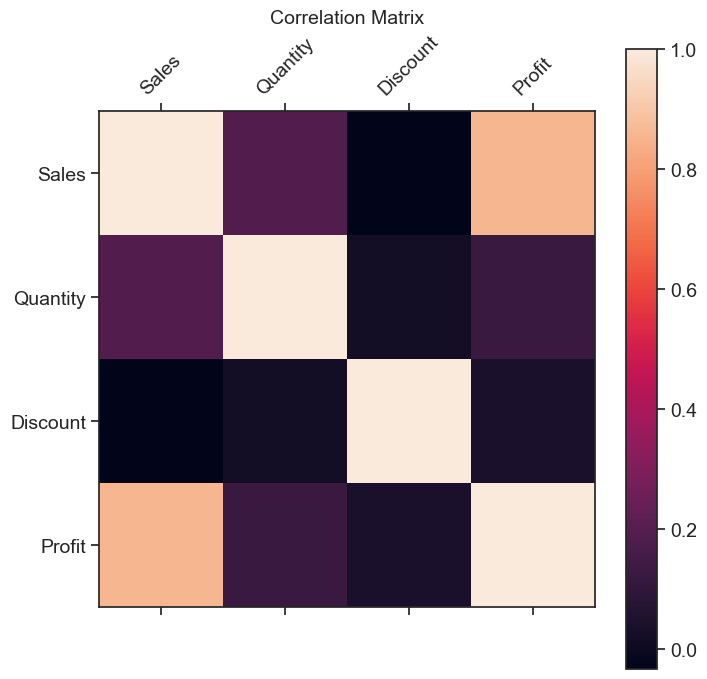

In [213]:
# creating correlation matrix
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig('Correlation Matrix1', dpi=300, bbox_inches='tight')
#plt.savefig('Correlation Matrix1')

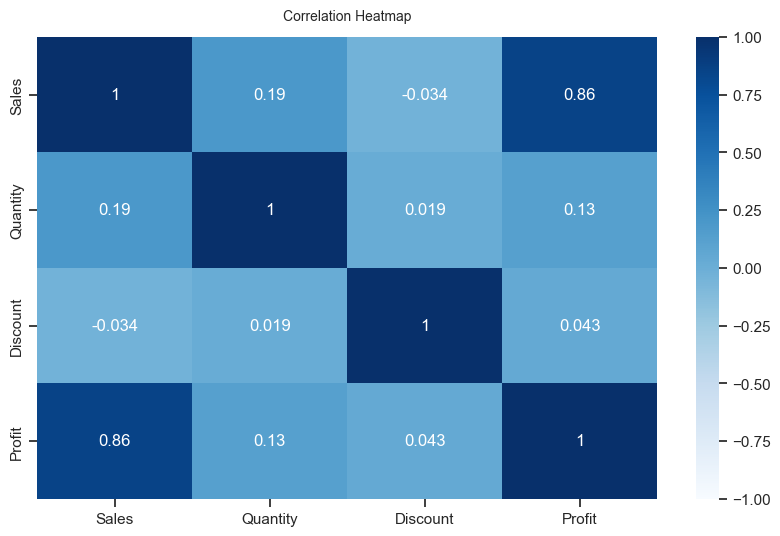

In [203]:
# creating correlation Heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_sub.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')




#### .strong positive relationship between profit and sales with coefficient correlation = 0.86
#### .weak relationship between profit and quantity with coefficient correlation = 0.13
#### .very weak relationship between profit and discount with coefficient correlation = 0.043


#### .Negative relationship between Discount and sales with coefficient correlation = -0.034


#### .weak relationship between Quantity and sales with coefficient correlation = 0.19

#### .very weak relationship between Quantity and discount with coefficient correlation = 0.019





#### Scatterplot:

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

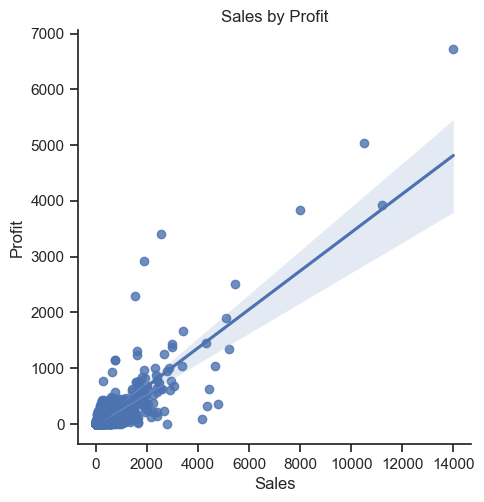

In [216]:
# scatterplot for the "Sales" and "profit" 
plt.figure(figsize=(10,6))
sns.lmplot(x = 'Sales', y = 'Profit', data = df_sub, palette='tab10')
plt.title('Sales by Profit')
plt.savefig('Sales by Profit', dpi=300, bbox_inches='tight')

##### There is strong relationship and most of the point are clustered at the base around the trend line. The closer the point at the trend line the better the fit. 
##### We have some point far away from the trend line and also outlier.


/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

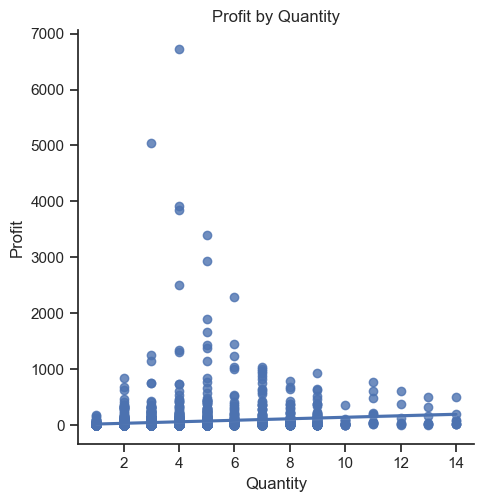

In [214]:
# scatterplot for the "Quantity" and "profit" 
plt.figure(figsize=(10,6))
sns.lmplot(x = 'Quantity', y = 'Profit', data = df_sub, palette='tab10')
plt.title('Profit by Quantity')
plt.savefig('Profit by Quantity', dpi=300, bbox_inches='tight')

##### The is week relationship and the trend line is a straight line with point scattered around

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

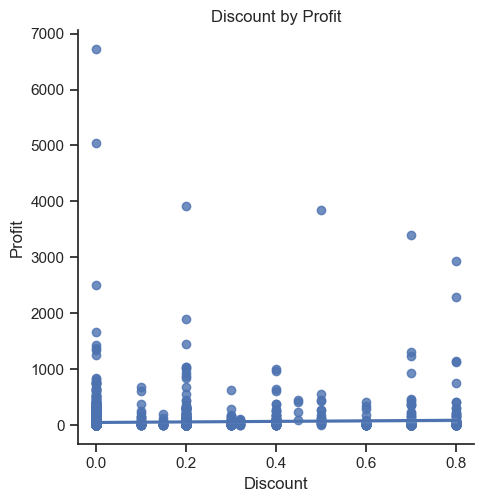

In [215]:
# scatterplot for the "Discount" and "profit" 
plt.figure(figsize=(10,6))
sns.lmplot(x = 'Discount', y = 'Profit', data = df_sub, palette='tab10')
plt.title('Discount by Profit')
plt.savefig('Discount by Profit', dpi=300, bbox_inches='tight')

##### The trend line is linear with the x axis. The point are all around showing very week correlation

####  Pairplot:   

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


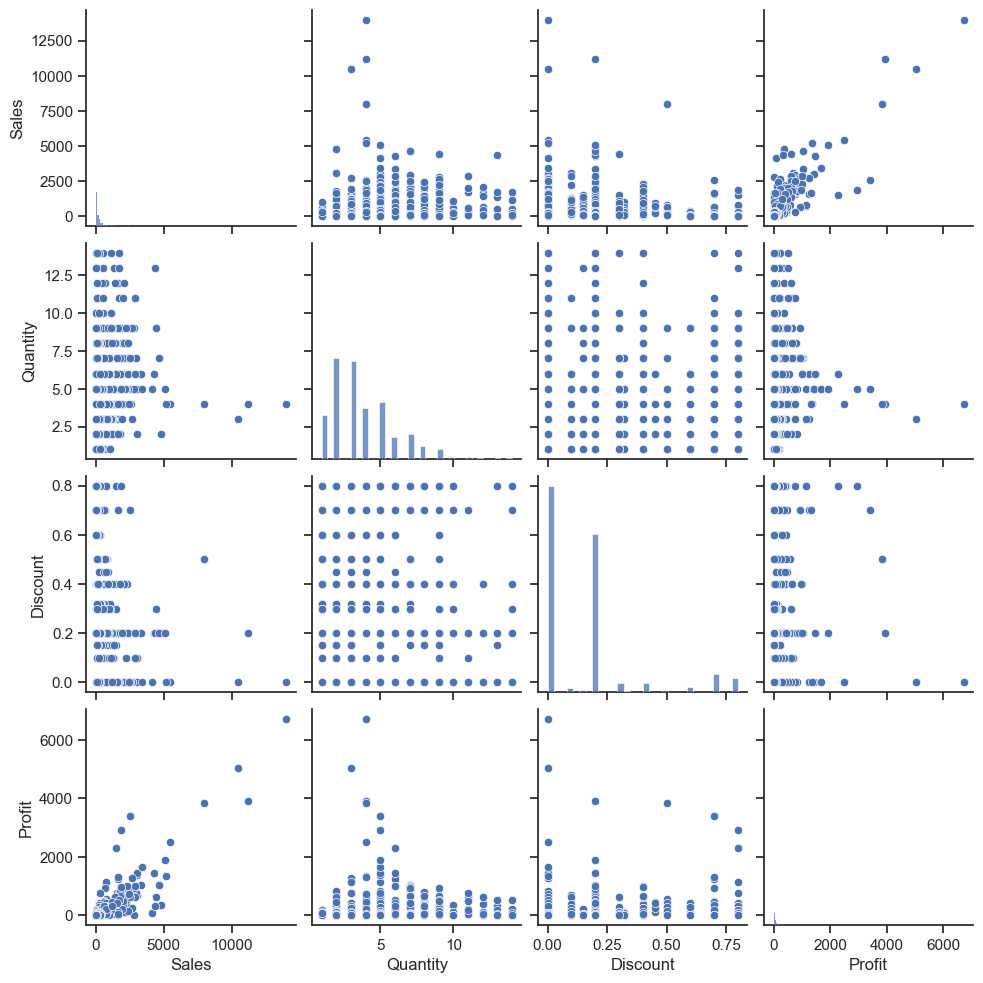

In [217]:
pairplot = sns.pairplot(df_sub)
plt.savefig('pairplot', dpi=300, bbox_inches='tight')

##### I notcied the profit histogram is not visible in the pair plot and further investigation will be neccessary

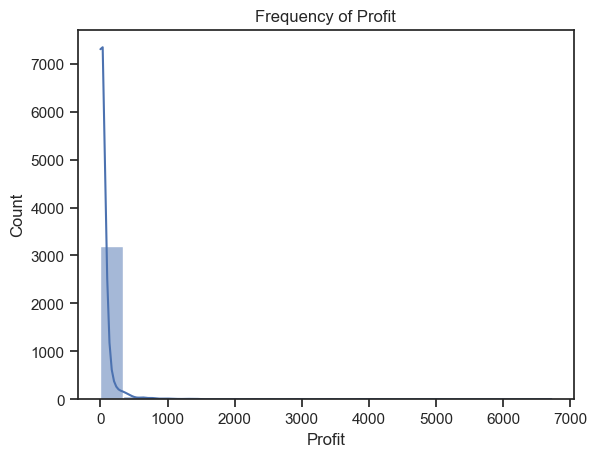

In [220]:
# creating profit histogram 
sns.histplot(df_sub['Profit'], bins = 20, kde = True)
plt.title('Frequency of Profit')
plt.savefig('H_Profit', dpi=300, bbox_inches='tight')

###### Profit is highly skewed towards the left, that is lower value and there are some outliers representing higher profit

In [134]:
# Creating a new profit dataset to investigate the distribution of profit

df_sub_Profit_50 = df_sub.loc[df_sub['Profit'] < 100]

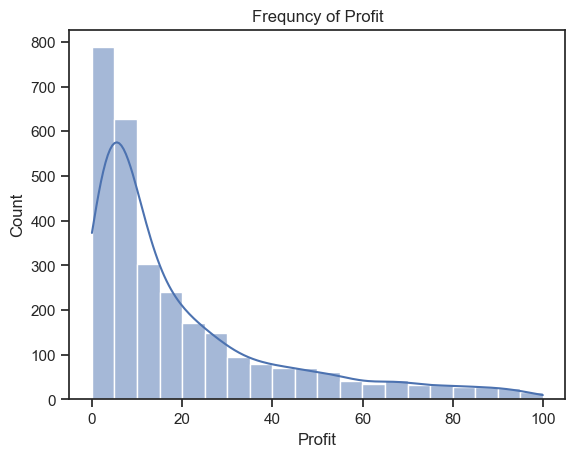

In [221]:
sns.histplot(df_sub_Profit_50['Profit'], bins = 20, kde = True)
plt.title('Frequncy of Profit')

plt.savefig('df_sub_Profit_50', dpi=300, bbox_inches='tight')

##### The profit is not higly distributed and it clustered around the lower value 

In [166]:
#creating a profit range for the low profit
df_US_Ecom.loc[df_US_Ecom['Profit'] < 30, 'Profit_Range'] = 'Low_Profit'

In [167]:
#creating a profit range for the medium profit
df_US_Ecom.loc[(df_US_Ecom['Profit'] >= 30) & (df_US_Ecom['Profit'] < 200), 'Profit_Range' ] = 'Medium_profit'

In [168]:
#creating a profit range for the high profit
df_US_Ecom.loc[df_US_Ecom['Profit'] > 200, 'Profit_Range'] = 'High_profit'

In [169]:
df_US_Ecom['Profit_Range'].value_counts()

Profit_Range
Low_Profit       2280
Medium_profit     838
High_profit       194
Name: count, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="N. shops", y="Price per unit", hue="Price category", data=df_US_Ecom)

#### Catplot:

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


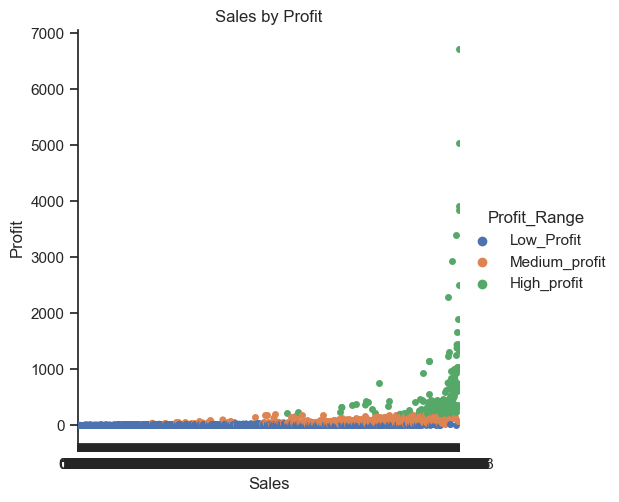

In [225]:
sns.set(style="ticks")
Catplot = sns.catplot(x="Sales", y="Profit", hue="Profit_Range", data=df_US_Ecom)
plt.title('Sales by Profit')
plt.savefig('Catplot', dpi=300, bbox_inches='tight')

##### From the catplot, the low_profit range cut across the sales from low sales to higher sales, the medium profit generated can be seen from almost mid sales  to higher sales, there are some High profit in the  around the middle of the sales but most high profit is clustered around the high sales.

### Answers to some of the questions I propose to look into 

##### Question . Is there any correlation between quantity order and discount

##### Answer : There is weak correlation betwen quantity and discount

##### Questions : Do discount led to more sales

##### Answers : Negative relationship between Discount and sales with coefficient correlation, no form of relationship between both variable

### Hypothesis:

##### If sales of product is higher then more profit will be generated 

### hypothesis
##### If a state in a region orders more quantity, then so the revenue generated from the quantity is higher.
##### If region has more order in quantity, then the revenue generated from sales in the region will be higher.

### Questions to look into:
##### • Which of the category or sub-category generate more revenue
##### • How do the sales vary over different months
##### • What category or sub category are the best-sellers in terms of quantity sold
##### • What is the type of category or sub-category are mostly order by each region
##### • Which of ship mode receive more discount
##### • Is there any correlation between shipping mode and discount
##### • Is there any correlation between quantity order and discount
##### • Do discount led to more sales
##### • Which of the state order more of the product

In [227]:
#saving dataframe as pki
df_US_Ecom.to_pickle(
'/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_US_Ecom2.pkl')